In [1]:
import os
import random
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook

**Change some file names randomly to create some noise in data.**

In [2]:
directory = os.listdir('./yes')
directory = [file for file in directory if file[-2:] == 'py']
change_name = random.choices(directory, k=10)
change_name

['584545.py',
 'test_scan_utils.py',
 'test_scancode_checks.py',
 '584545.py',
 'octal_literals_test.py',
 '584541.py',
 '584547.py',
 'testcase.py',
 '584542.py',
 '584544.py']

In [2]:
for i, file in enumerate(change_name):
    os.rename('./yes/' + file, './yes/' + '58454' + f'{i}' + '.py')

NameError: name 'change_name' is not defined

In [3]:
# recursively scan for files from the root directory

file_paths_yes = []

for subdir, dirs, files in os.walk('.\\yes'):
    for file in files:
        file_paths_yes.append(os.path.join(subdir, file).replace('\\', '/'))

In [4]:
file_paths_yes

['./yes/584540.py',
 './yes/584541.py',
 './yes/584542.py',
 './yes/584543.py',
 './yes/584544.py',
 './yes/584545.py',
 './yes/584546.py',
 './yes/584547.py',
 './yes/584548.py',
 './yes/584549.py',
 './yes/octal_literals_test.py',
 './yes/percent_format_test.py',
 './yes/set_literals_test.py',
 './yes/six_test.py',
 './yes/super_test.py',
 './yes/testcase.py',
 './yes/test_api.py',
 './yes/test_scancode_checks.py',
 './yes/test_scan_utils.py',
 './yes/stuff/binary_literals_test.py',
 './yes/stuff/conftest.py',
 './yes/stuff/data.py',
 './yes/stuff/default_encoding_test.py',
 './yes/stuff/dict_literals_test.py',
 './yes/stuff/discovery_test.py',
 './yes/stuff/encoding_cookie_test.py',
 './yes/stuff/escape_sequences_test.py',
 './yes/stuff/extra_parens_test.py',
 './yes/stuff/file_diff_stat_test.py',
 './yes/stuff/format_literals_test.py',
 './yes/stuff/fstrings_test.py',
 './yes/stuff/__init__ (3).py',
 './yes/stuff/__init__.py',
 './yes/testing/test_cli (2).py',
 './yes/testing/test_

In [83]:
# features like ## Features (Test file binary classification) - 'test' in filename, 'test' in absolute path,
# 'test' word count, 'assert' word count, 'testing library imported or not', neighbourhood filenames.

def extract_features_from_file_paths(paths):
    
    filenames = []
    test_in_filename = []
    test_in_directory_path = []
    test_word_count = []
    assert_word_count = []
    testing_library_imported_or_not = []
    test_count_in_neighbouring_filenames = []
    
    for path in paths:
        
        try:
            with open(path, encoding="utf8") as file:
                content = file.read()
                test_word_count.append((content.count('test')/len(content.split(' ')))*100)
                assert_word_count.append((content.count('assert')/len(content.split(' ')))*100)
                testing_library_imported_or_not.append('import pytest' in content)
                
        except Exception as e:
            print(path, e)
            continue
            
        filenames.append(os.path.basename(path))
        test_in_filename.append('test' in os.path.basename(path))
        test_in_directory_path.append('test' in os.path.dirname(path))
        
        neighbours = os.listdir(os.path.dirname(path))
        count = 0
        for filename in neighbours:
            if 'test' in filename:
                count += 1
        test_count_in_neighbouring_filenames.append(count)
        
    return pd.DataFrame({'filename':filenames, 'test_in_filename':test_in_filename, 'test_in_directory_path':test_in_directory_path, '%test_word_count':test_word_count, '%assert_word_count':assert_word_count, 'testing_library_imported_or_not':testing_library_imported_or_not, 'test_count_in_neighbouring_filenames':test_count_in_neighbouring_filenames})
 

In [84]:
df = extract_features_from_file_paths(file_paths_yes)

In [85]:
df

,filename,test_in_filename,test_in_directory_path,%test_word_count,%assert_word_count,testing_library_imported_or_not,test_count_in_neighbouring_filenames
0,584540.py,False,False,5.862069,0.344828,True,11
1,584541.py,False,False,0.964630,1.350482,False,11
2,584542.py,False,False,1.223242,1.376147,False,11
3,584543.py,False,False,1.571709,0.589391,True,11
4,584544.py,False,False,0.355100,0.118367,True,11
5,584545.py,False,False,0.791497,0.067843,True,11
6,584546.py,False,False,9.473684,2.105263,True,11
7,584547.py,False,False,1.687764,0.421941,True,11
8,584548.py,False,False,2.564103,1.025641,True,11
9,584549.py,False,False,0.284784,0.244101,True,11


In [86]:
# Similarly, exted the dataset for the 'not test file' labels

file_paths_no = []

for subdir, dirs, files in os.walk('.\\no'):
    for file in files:
        file_paths_no.append(os.path.join(subdir, file).replace('\\', '/'))

In [87]:
file_paths_no = file_paths_no[:150]
file_paths_no

['./no/ (2).gitignore',
 './no/pyupgrade.py',
 './no/README (2).md',
 './no/README.md',
 './no/requirements-dev.txt',
 './no/requirements.txt',
 './no/setup.py',
 './no/test.cfg',
 './no/test1.py',
 './no/test2.cfg',
 './no/tox.ini',
 './no/camelot/cli.py',
 './no/camelot/core.py',
 './no/camelot/handlers.py',
 './no/camelot/image_processing.py',
 './no/camelot/io.py',
 './no/camelot/plotting.py',
 './no/camelot/utils.py',
 './no/camelot/__init__.py',
 './no/camelot/__main__.py',
 './no/camelot/__version__.py',
 './no/camelot/ext/__init__.py',
 './no/camelot/ext/ghostscript/COPYING',
 './no/camelot/ext/ghostscript/_gsprint.py',
 './no/camelot/ext/ghostscript/__init__.py',
 './no/camelot/parsers/base.py',
 './no/camelot/parsers/lattice.py',
 './no/camelot/parsers/stream.py',
 './no/camelot/parsers/__init__.py',
 './no/docs/api.rst',
 './no/docs/conf.py',
 './no/docs/index.rst',
 './no/docs/make.bat',
 './no/docs/Makefile',
 './no/docs/benchmark/lattice/agstat/agstat-data-camelot-page-1-

In [88]:
df_no = extract_features_from_file_paths(file_paths_no)

./no/docs/benchmark/lattice/agstat/agstat-table-detection-camelot.png 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
./no/docs/benchmark/lattice/agstat/agstat-table-detection-tabula.png 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
./no/docs/benchmark/lattice/agstat/agstat.pdf 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
./no/docs/benchmark/lattice/background_lines_1/background_lines_1-table-detection-camelot.png 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
./no/docs/benchmark/lattice/background_lines_1/background_lines_1-table-detection-tabula.png 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
./no/docs/benchmark/lattice/background_lines_1/background_lines_1.pdf 'utf-8' codec can't decode byte 0xa1 in position 11: invalid start byte
./no/docs/benchmark/lattice/background_lines_2/background_lines_2-table-detection-camelot.png 'utf-8' codec can't decode by

In [89]:
df_no

,filename,test_in_filename,test_in_directory_path,%test_word_count,%assert_word_count,testing_library_imported_or_not,test_count_in_neighbouring_filenames
0,(2).gitignore,False,False,100.000000,0.000000,False,4
1,pyupgrade.py,False,False,0.128979,0.074891,False,4
2,README (2).md,False,False,0.097513,0.292540,False,4
3,README.md,False,False,0.420168,0.000000,False,4
4,requirements-dev.txt,False,False,100.000000,0.000000,False,4
5,requirements.txt,False,False,0.000000,0.000000,False,4
6,setup.py,False,False,0.583431,0.000000,False,4
7,test.cfg,True,False,38.461538,0.000000,False,4
8,test1.py,True,False,0.000000,0.000000,False,4
9,test2.cfg,True,False,1.379310,0.000000,False,4


In [90]:
# Set the true labels 

df['label'] = [True]*len(df)
df_no['label'] = [False]*len(df_no)

In [91]:
# convert boolean dtypes to int (this is a hack trick)

df = df*1
df_no = df_no*1

In [92]:
dataset = pd.concat([df, df_no], axis=0)

In [93]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(dataset, test_size=0.5)

<IPython.core.display.Javascript object>


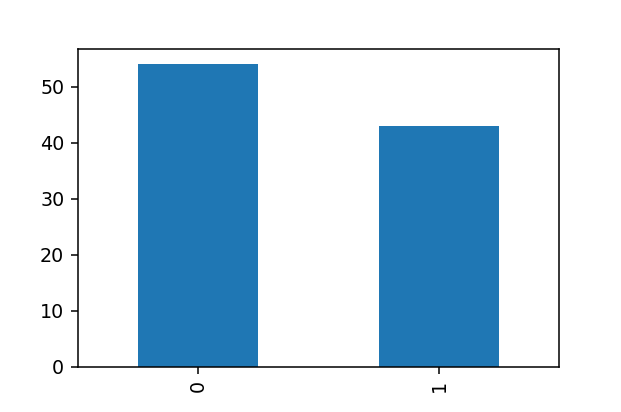

In [37]:
pd.value_counts(Train['label']).plot.bar()

<IPython.core.display.Javascript object>


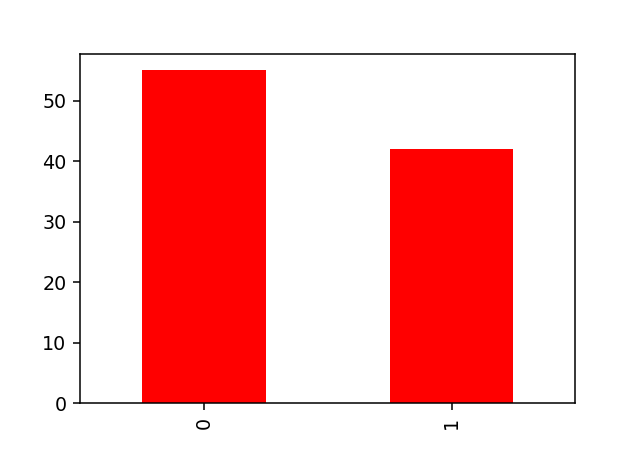

In [38]:
pd.value_counts(Test['label']).plot.bar(color='R')

In [94]:
filenames_train = Train.pop('filename') 
filenames_test = Test.pop('filename') 

In [95]:
y_train = Train.pop('label') 
y_test = Test.pop('label') 

In [96]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(Train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
y_pred = svclassifier.predict(Test)

In [98]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


# Final Thoughts:


- The model always gives 100 % accuracy, this means that machine leaning for binary classification of test/non test files is a simple task and can be solved via heuristics approach too. 

- The accuracy may vary if we include other project structures (like C/C++, JavaScript, Flutter, etc.)

- A more detailed analysis upon classification of file purpose via single model is in progress

In [99]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=120)
rfclf.fit(Train, y_train)

y_pred_rf = rfclf.predict(Test)

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9716981132075472


In [101]:
rfclf.feature_importances_

array([0.04142225, 0.3175592 , 0.24000834, 0.11616259, 0.02378171,
       0.26106591])

In [102]:
Train.columns

Index(['test_in_filename', 'test_in_directory_path', '%test_word_count',
       '%assert_word_count', 'testing_library_imported_or_not',
       'test_count_in_neighbouring_filenames'],
      dtype='object')

<IPython.core.display.Javascript object>


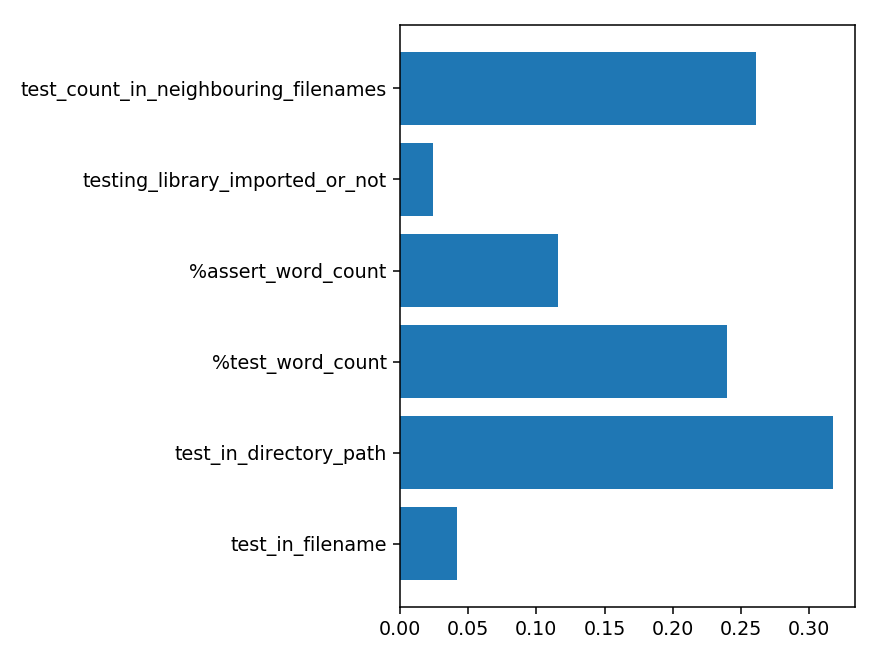

In [103]:
plt.barh(Train.columns, rfclf.feature_importances_)
plt.tight_layout()

<IPython.core.display.Javascript object>


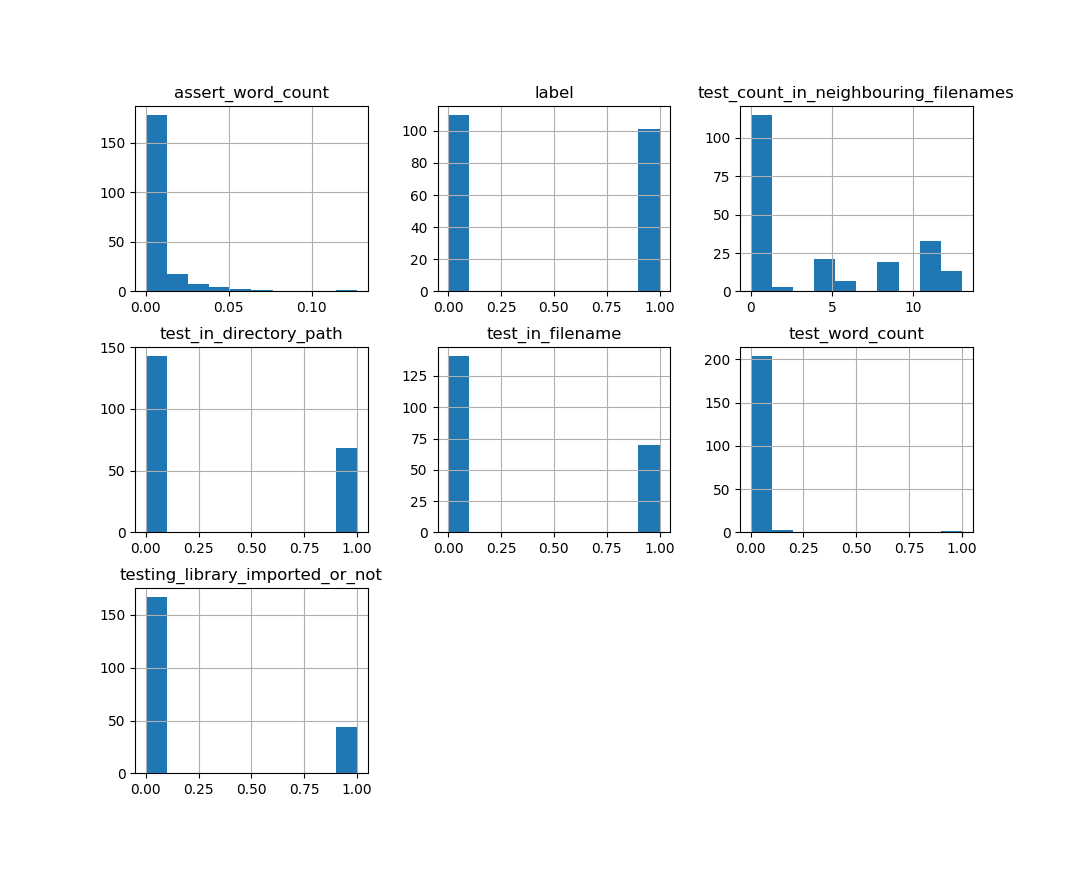

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207C67A9710>,
      dtype=object)

In [81]:
pd.concat([df, df_no]).hist()